# Exploratory Data Analysis & Visualization
---
This notebook covers the exploration of our data to gather relevant insights.

## Importing all the necessary libraries

In [4]:
# Basic Libraries
!pip install wordcloud
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Importing Cleaned Dataset

In [5]:
# Loading clean dataset for EDA
anime_info_2020 = pd.read_csv('datasets/anime_2020_clean.csv')
anime_review = pd.read_csv('datasets/anime_review_clean.csv')

In [6]:
print("The shape of the Anime 2020 CSV is:")
print(anime_info_2020.shape)
print()
print("Information of the Anime 2020 CSV:")
print(anime_info_2020.info())
print()
print("========================================")
print("The shape of the Anime 2020 Review Rating CSV is:")
print(anime_review.shape)
print()
print("Information of the Anime 2020 CSV:")
print(anime_review.info())

The shape of the Anime 2020 CSV is:
(8094, 9)

Information of the Anime 2020 CSV:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8094 entries, 0 to 8093
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         8094 non-null   int64  
 1   title       8094 non-null   object 
 2   synopsis    8094 non-null   object 
 3   genre       8094 non-null   object 
 4   aired       8094 non-null   object 
 5   episodes    8094 non-null   float64
 6   members     8094 non-null   int64  
 7   popularity  8094 non-null   int64  
 8   score       8094 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 569.2+ KB
None

The shape of the Anime 2020 Review Rating CSV is:
(129988, 4)

Information of the Anime 2020 CSV:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129988 entries, 0 to 129987
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0 

## Exploratory Data Analysis for Anime Info
---
Before we start the exploratory data analysis, these are the variables left in the cleaned anime info dataset.

> **Uid**       : Unique ID for each anime.  
> **Title**     : The romanisation of the Japanese title of the anime.  
> **Synopsis**  : A brief description or summary of the anime's plot.  
> **Genres**    : The genre(s) of the anime, seperated by commas.  
> **Aired**     : The dates when the anime was aired.  
> **Episodes**  : The number of episodes that the anime have.  
> **Members**   : The number of people who have added the anime to their list on MyAnimeList.  
> **Popularity**: The popularity rank of the anime based on members.   
> **Score**     : The weighted score of the anime. 

### Top 10 Anime Based on Popularity
To start things off, we shall find out the top 10 anime based on popularity.

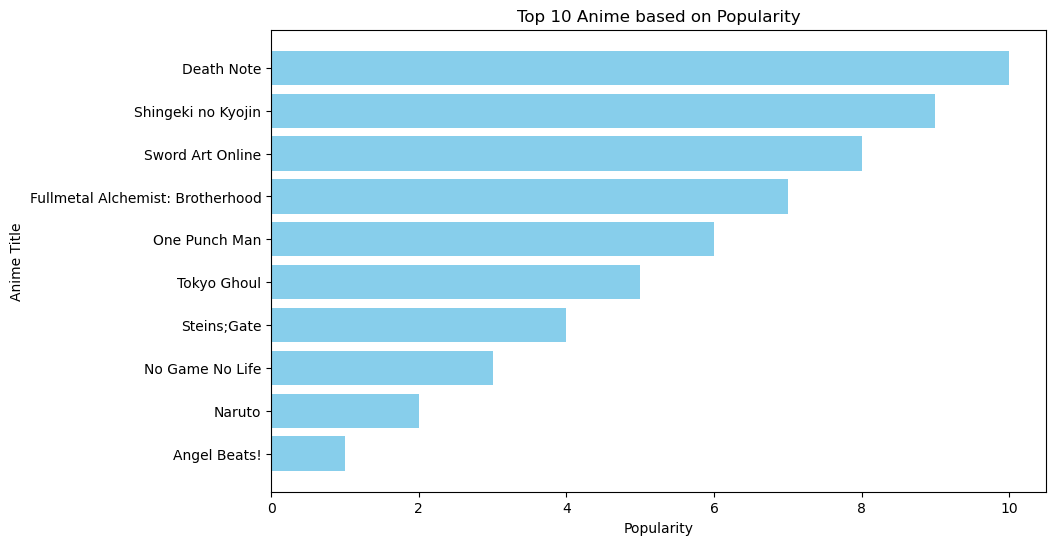

In [7]:
# Count the occurrences of each unique anime_uid and select the top 10
top_10_popular = anime_info_2020.sort_values(by='popularity', ascending=True).head(10)

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_popular['title'], 11 - top_10_popular['popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Anime Title')
plt.title('Top 10 Anime based on Popularity')
plt.gca().invert_yaxis() 
plt.show()

As seen in the barplot (with the popularity of 10 being the most popular), the top 3 anime in 2020 is Death Note followed by Attack on Titan (Shingeki no Kyojin) and Sword Art Online.

Aside from knowing the top anime shows back in 2020, let us find the genres that appear most frequently in anime shows by creating a word cloud.

### Wordcloud of Genres

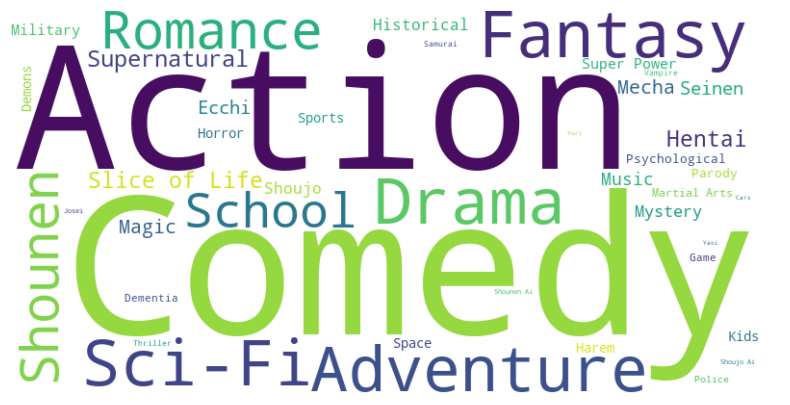

In [8]:
# Initialize an empty list to store all genres
all_genres = []

# Iterate over each row in the DataFrame
for genres_str in anime_info_2020['genre']:
    # Convert the string representation of genres into a list
    genres_list = eval(genres_str)
    # Extend the list of genres
    all_genres.extend(genres_list)

# Generate word cloud with frequency information
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pd.Series(all_genres).value_counts())

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Looking at the wordcloud, we can tell at a glance that the most common genre in anime shows includes Comedy, Action, Fantasy, Sci-Fi and Adventure.

However, a wordcloud does not give us a numerical value for these genres. Therefore, we would use a barplot to show the top 10 common genres in anime shows. 

### Barplot of Genres

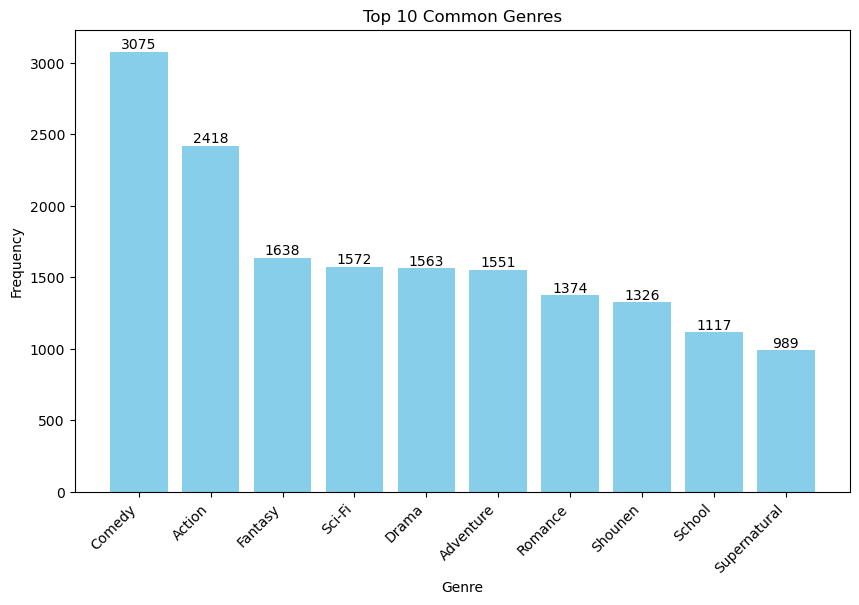

In [9]:
# Initialize an empty list to store genre count
genre_counts = {}

for genre in all_genres:
    if genre in genre_counts:
        genre_counts[genre] += 1
    else:
        genre_counts[genre] = 1

# Sort the genre counts by frequency and select the top 10
top_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_genre_names = [genre[0] for genre in top_genres]
top_genre_counts = [genre[1] for genre in top_genres]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_genre_names, top_genre_counts, color='skyblue')
plt.title('Top 10 Common Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

for i in range(len(top_genre_counts)):
    plt.text(i, top_genre_counts[i], str(top_genre_counts[i]), ha='center', va='bottom')

plt.show()

As seen in the barplot, most anime shows consist of the Comedy genre followed by Action, Fantasy, Sci-Fi, Drama, Adventure and Romance. As such, these genres may appear more often in the anime recommendation list.

## Top 10 genres based on MAL Score

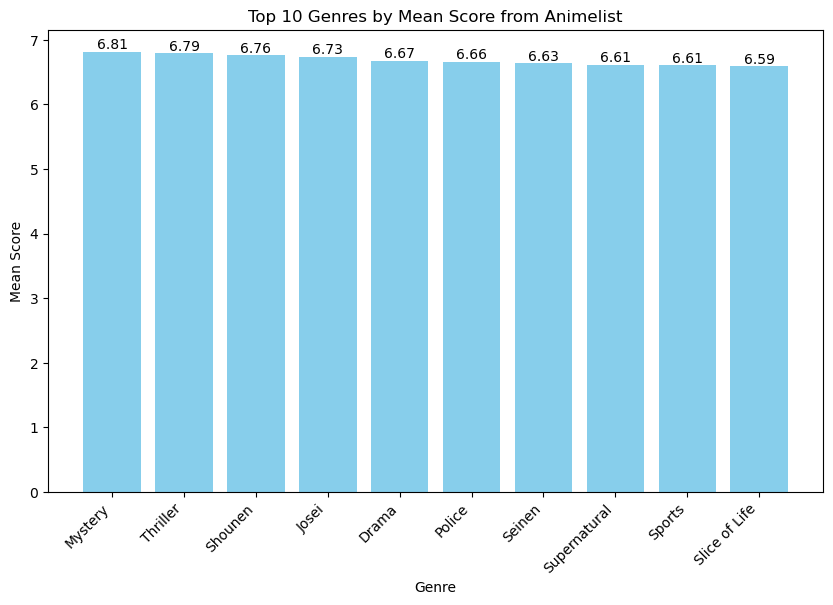

In [10]:
# Initialize a list to store the list of genres with corresponding scores
genres_with_scores = []

# Iterate over each row in the DataFrame
for index, row in anime_info_2020.iterrows():
    # Convert the string representation of genres into a list
    genres = row['genre'].split(', ')
    score = int(row['score'])  
    # Append the list of genres with the corresponding score as a tuple to the list
    genres_with_scores.append((genres, score))
    
# Initialize dictionaries to store scores and counts for each genre
genre_scores = {}
genre_counts = {}

# Iterate over each entry in the list of lists
for genres_list, score in genres_with_scores:
    # Convert the string representation of genres into a list
    genres = eval(','.join(genres_list))
    # Iterate over each genre in the current entry
    for genre in genres:
        # Add the score to the genre's total score
        if genre in genre_scores:
            genre_scores[genre] += score
            genre_counts[genre] += 1
        else:
            genre_scores[genre] = score
            genre_counts[genre] = 1

# Calculate the mean score for each genre
mean_scores = {genre: genre_scores[genre] / genre_counts[genre] for genre in genre_scores}

# Sort the mean scores by value and select the top 10
top_genres = sorted(mean_scores.items(), key=lambda x: x[1], reverse=True)[:10]
top_genre_names = [genre[0] for genre in top_genres]
top_genre_scores = [genre[1] for genre in top_genres]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_genre_names, top_genre_scores, color='skyblue')
plt.title('Top 10 Genres by Mean Score from Animelist')
plt.xlabel('Genre')
plt.ylabel('Mean Score')
plt.xticks(rotation=45, ha='right')

for i in range(len(top_genre_scores)):
    plt.text(i, top_genre_scores[i], "{:.2f}".format(top_genre_scores[i]), ha='center', va='bottom')

plt.show()

The bar plot shows that the mean score from MAL do not differ much for the top 10 genres. This goes to show that the genre of an anime may not have a huge impact on its score. 

### Score distribution for Anime shows (score given by MAL)

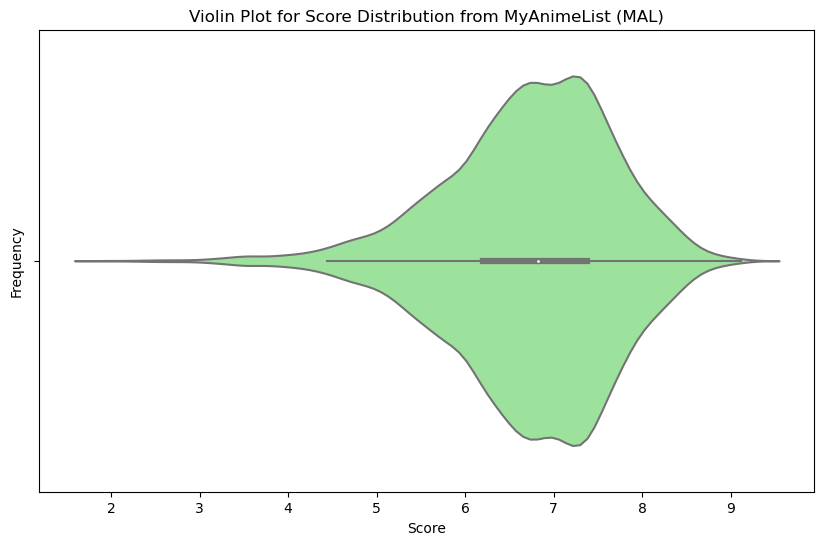

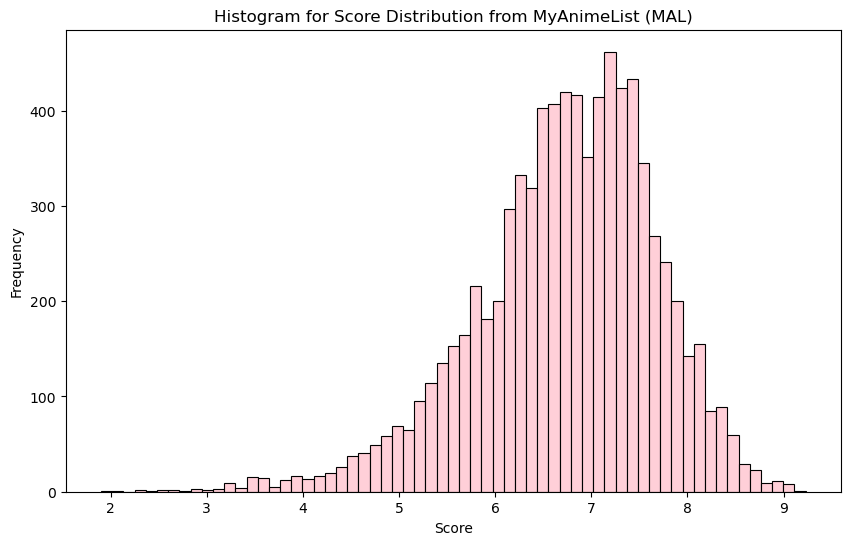

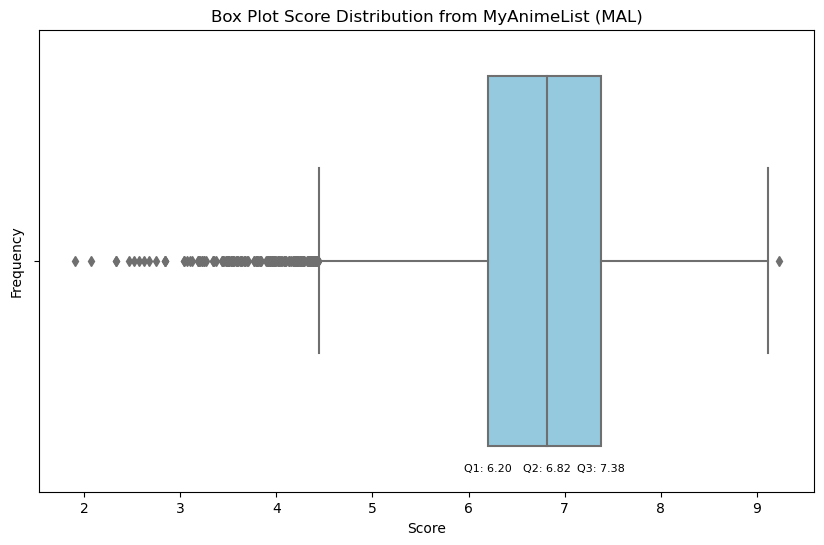

In [11]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a violin plot using Seaborn
sns.violinplot(x=anime_info_2020['score'], color='lightgreen')

# Add a title and labels to the plot
plt.title('Violin Plot for Score Distribution from MyAnimeList (MAL)')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram plot using Seaborn
sns.histplot(anime_info_2020['score'], color='pink')

# Add a title and labels to the plot
plt.title('Histogram for Score Distribution from MyAnimeList (MAL)')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot using Seaborn
sns.boxplot(x=anime_info_2020['score'], color='skyblue')

# Add a title and labels to the plot
plt.title('Box Plot Score Distribution from MyAnimeList (MAL)')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Add quartile annotations
q1 = anime_info_2020['score'].quantile(0.25)
q2 = anime_info_2020['score'].quantile(0.50)
q3 = anime_info_2020['score'].quantile(0.75)

plt.text(q1, 0.45, 'Q1: {:.2f}'.format(q1), verticalalignment='center', horizontalalignment='center', color='black', fontsize=8)
plt.text(q2, 0.45, 'Q2: {:.2f}'.format(q2), verticalalignment='center', horizontalalignment='center', color='black', fontsize=8)
plt.text(q3, 0.45, 'Q3: {:.2f}'.format(q3), verticalalignment='center', horizontalalignment='center', color='black', fontsize=8)

# Display the plot
plt.show()

Looking at all three diagrams, we can tell at a glance that the variable, 'score' is skewed to the left. As such, there are more outliers that lie outside the lower interquartile range as compared to outliers outside the upper interquartile range. Based on the box plot, the median score of anime shows on MyAnimeList (MAL) is 6.82 with an inter-quartile range of 1.18. Therefore, when recommending anime shows, we may use the median score as a rough gauge.

## Correlation Matrix for Numerical Data

<Axes: >

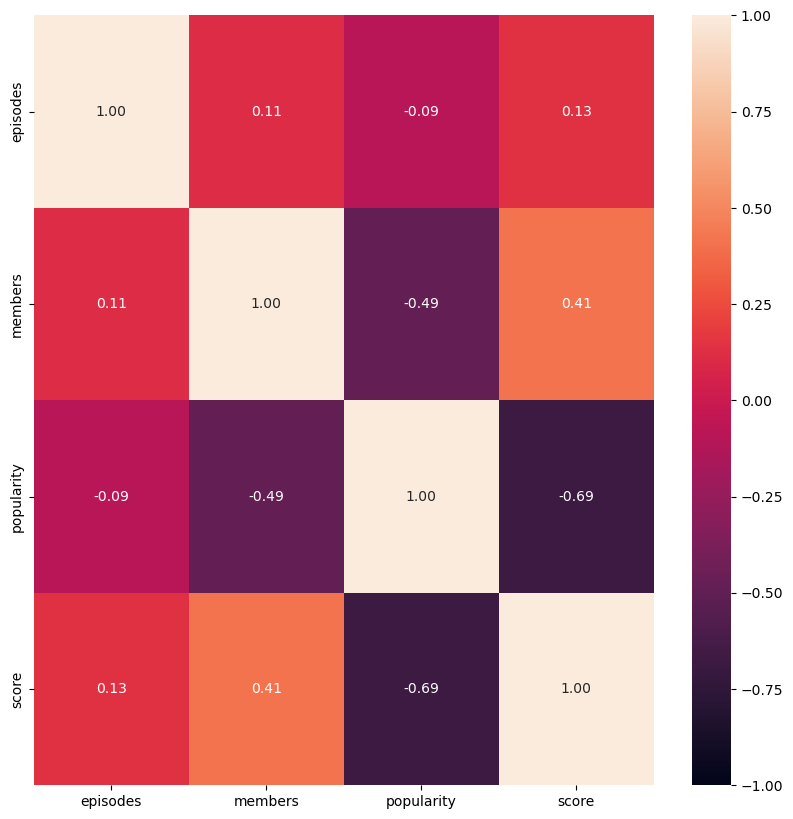

In [12]:
anime_info_correlation = anime_info_2020.drop(columns=['title','synopsis','genre','aired','uid'])

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10,10))
sb.heatmap(anime_info_correlation.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")


From the Correlation Matrix, we can tell that the numerical variables in the dataset are moderately correlated at best. Due to the fact that the variable, 'popularity' assigns the most popular anime with the value of 1, this causes the correlation to appear inversely related. As such, what seems to be a moderately high negative correlation with the variable 'score' is in reality a moderately high positive correlation instead. The same can be said for the variable 'members' which appear to have a moderate negative correlation with 'popularity'. In reality, it is a moderate positive correlation. 

Lastly, the variable 'members' have a moderate positive relation with 'score' while the rest of the numerical variables seem to have low correlations with one another.

### Pairplot for numerical variables

/Users/huangyuxuan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


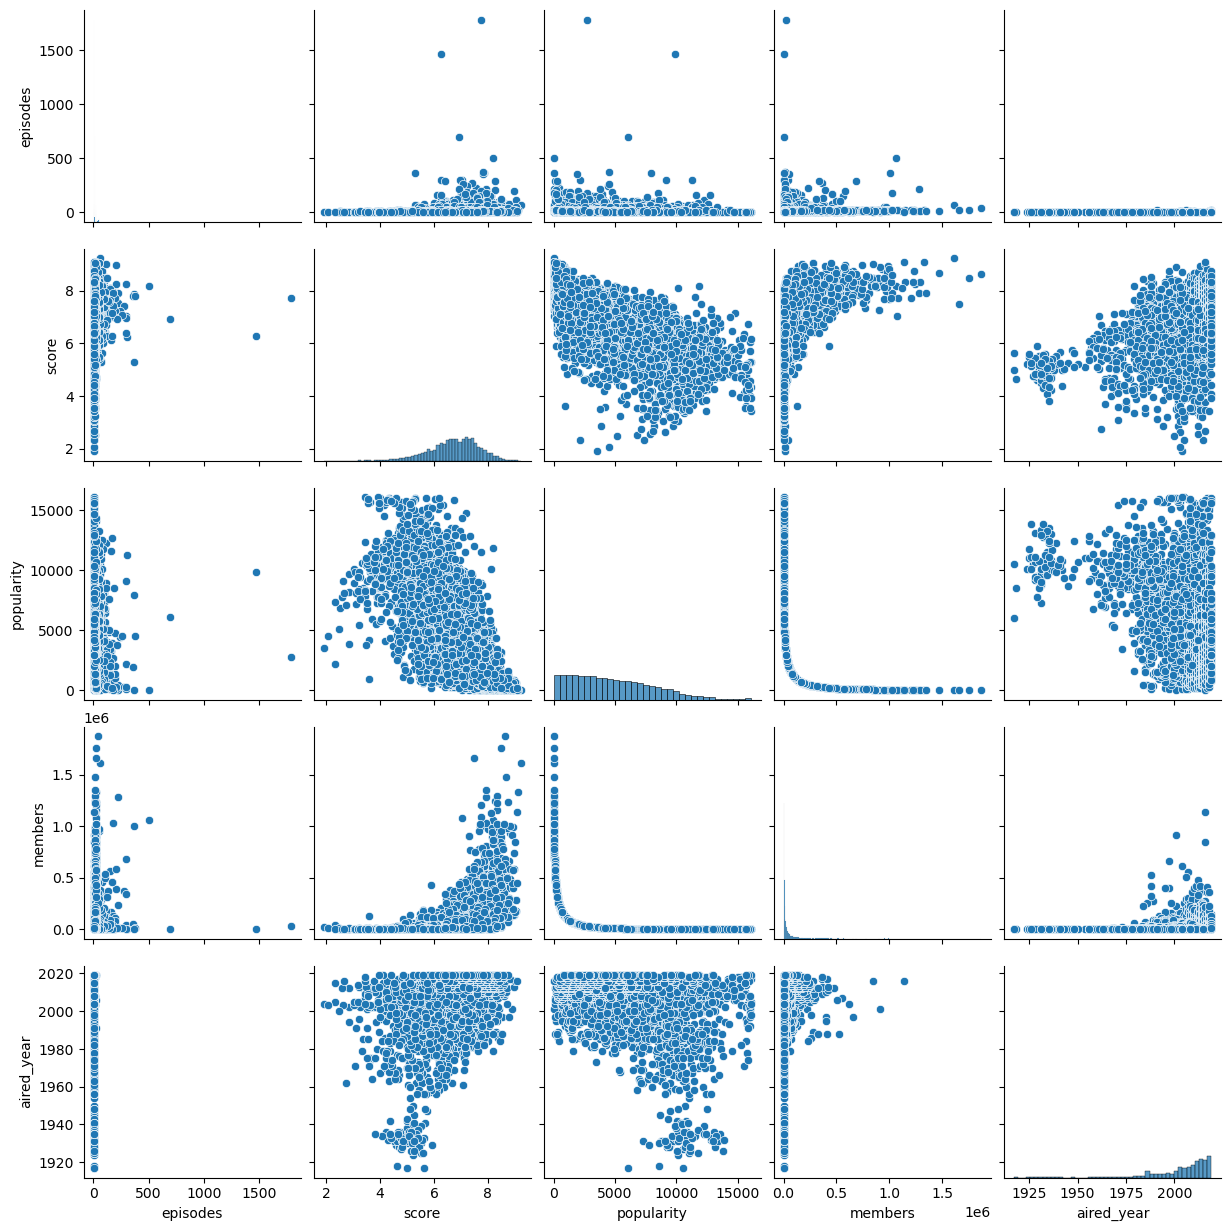

In [13]:
# Parse the airing dates to extract the years
anime_info_2020['aired_from'] = pd.to_datetime(anime_info_2020['aired'], errors='coerce', format='mixed')
anime_info_2020['aired_year'] = anime_info_2020['aired_from'].dt.year

# Select relevant numerical variables for the pairplot
selected_variables = ['episodes', 'score', 'popularity', 'members', 'aired_year']

# Create the pairplot
sns.pairplot(anime_info_2020[selected_variables])
plt.show()

This pairplot showcases similar information as the correlation matrix. However with this pairplot, we can now see the relationship between all the numerical variables in our anime_info_2020 dataset and how they affect one another. This is a contrast to just having the numerical value of the correlation.

## Exploratory Data Analysis for Anime Review
---
Now we will proceed to explore the anime review dataset. These are the variables left in the cleaned anime review dataset.
 
> **Profile**   : The username of the user.  
> **Anime uid** : Unique ID for the anime.   
> **Score**     : The overall score.  
> **Scores**    : The breakdown of the score into 'Story', 'Animation', 'Sound', 'Character' and 'Enjoyment'.  

### Top 10 anime based on Review ratings

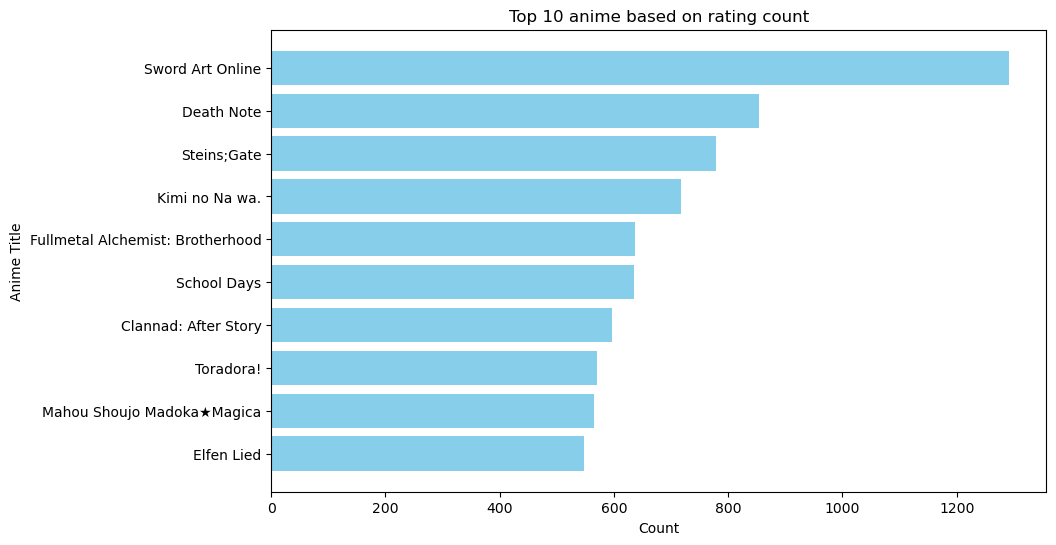

In [14]:
# Count the occurrences of each unique anime_uid and select the top 10
top_10_anime_uid = anime_review['anime_uid'].value_counts().head(10)

# Get the corresponding titles for the top 10 anime_uid values
top_10_titles = anime_info_2020.loc[anime_info_2020['uid'].isin(top_10_anime_uid.index), ['uid', 'title']]

# Merge the titles with the top 10 anime_uid values from anime_review
top_10_titles_with_uid = top_10_titles.merge(top_10_anime_uid, left_on='uid', right_index=True)

# Sort merged data by count in ascending order
merged_data_sorted = top_10_titles_with_uid.sort_values(by='count', ascending=True)

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.barh(merged_data_sorted['title'], merged_data_sorted['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Anime Title')
plt.title('Top 10 anime based on rating count')
plt.show()


This bar plot shows the top 10 animes based on the number of ratings it got from users, which shows that these animes are very popular amongst users and would be good for recommendation, which means it will appear more on the recommendation list.

### Score distribution for Anime (scores given by mean User Review Ratings)

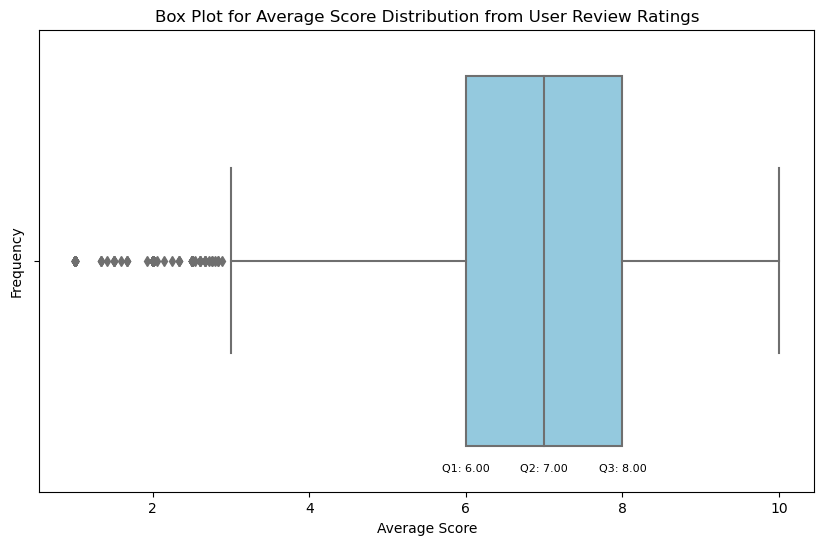

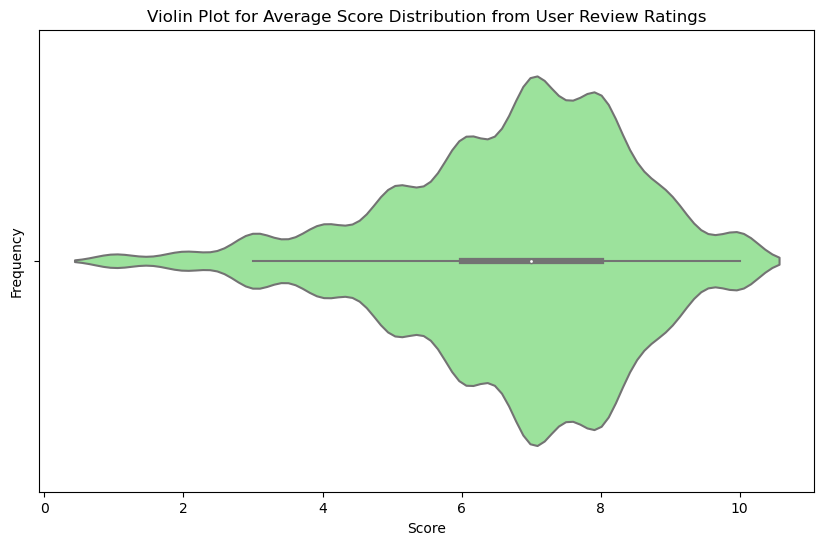

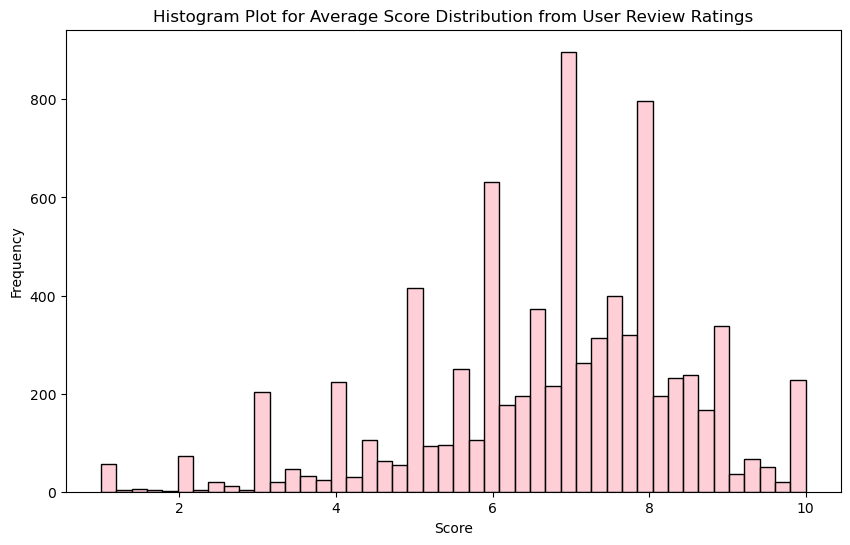

In [15]:
# Group by 'uid' and calculate the mean score for each anime
average_scores = anime_review.groupby('anime_uid')['score'].mean().astype(float)

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=average_scores, color='skyblue')

# Add title and labels
plt.title('Box Plot for Average Score Distribution from User Review Ratings')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Calculate quartiles
q1 = average_scores.quantile(0.25)
q2 = average_scores.quantile(0.50)
q3 = average_scores.quantile(0.75)

# Add quartile annotations
plt.text(q1, 0.45, 'Q1: {:.2f}'.format(q1), verticalalignment='center', horizontalalignment='center', color='black', fontsize=8)
plt.text(q2, 0.45, 'Q2: {:.2f}'.format(q2), verticalalignment='center', horizontalalignment='center', color='black', fontsize=8)
plt.text(q3, 0.45, 'Q3: {:.2f}'.format(q3), verticalalignment='center', horizontalalignment='center', color='black', fontsize=8)

# Show the plot
plt.show()

# Set the figure size for violin plot
plt.figure(figsize=(10, 6))

# Create a violin plot using Seaborn
sns.violinplot(x=average_scores, color='lightgreen')

# Add a title and labels to the plot
plt.title('Violin Plot for Average Score Distribution from User Review Ratings')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Set the figure size for histogram
plt.figure(figsize=(10, 6))

# Create a histogram plot using Seaborn
sns.histplot(average_scores, color='pink', kde=False)

# Add a title and labels to the plot
plt.title('Histogram Plot for Average Score Distribution from User Review Ratings')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()

These three diagram show the distribution amongst the average rating scores of each anime. Even though it is similar to the one above whereby it is also skewed to the left, these three diagrams are based on users ratings instead of the score given by MAL. Thus when giving a recommendation based on user-based collaborative filtering, we may use the median score of 7.00 with a interquartile range of 2 as a rough gauge. 

### Relationship between mean user ratings and aired year

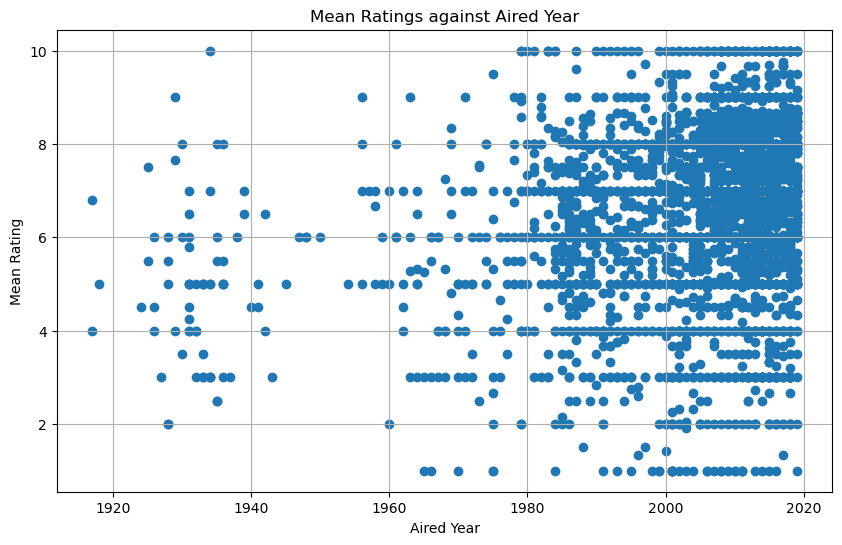

Correlation between airing year and mean rating: 0.1969265576885014


In [17]:
# Step 1: Calculate mean ratings for each anime
mean_ratings = anime_review.groupby('anime_uid')['score'].mean().reset_index()

# Step 2: Merge mean ratings with anime_info_2020 based on UID
merged_data = pd.merge(anime_info_2020, mean_ratings, left_on='uid', right_on='anime_uid', how='inner')

# Step 3: Plot scatter plot of aired years against mean ratings
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['aired_year'], mean_ratings['score'])
plt.title('Mean Ratings against Aired Year')
plt.xlabel('Aired Year')
plt.ylabel('Mean Rating')
plt.grid(True)
plt.show()

# Compute the Pearson correlation coefficient
correlation = mean_ratings['score'].corr(merged_data['aired_year'])

print("Correlation between airing year and mean rating:", correlation)

This scatter plot shows the relationship between the mean user ratings and the year the anime aired. It shows that most anime aired later in the 2000s, which could be due to the rising popularity in anime. Furthermore, the year which the anime aired has a poor correlation with the mean ratings given, with a correlation of 0.197. 

This goes to show that despite there being newer animes, users do not necessarily have to like it more. From this scatter plot, we know that the year the anime aired does not have a strong correlation with user's review rating. 